# Load model and weights 

In [75]:
from keras.models import load_model
% matplotlib inline

# load model
model = load_model("models/ship_classification_model.h5")

# Have a look at the output of intermediate layers

In [72]:
from keras.models import Model
import numpy as np

intermediate_model = Model(inputs=model.input, outputs=model.get_layer(index=1).output)


In [73]:
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt


# load image
img_path = "input/test"
img_path = os.path.join(img_path, "0a5ae8465.jpg")
img = mpimg.imread(img_path)
img = np.expand_dims(img, axis=0)

prediction = intermediate_model.predict(img)[0]
outputs = [prediction[..., i] for i in range(np.size(prediction, 2))]

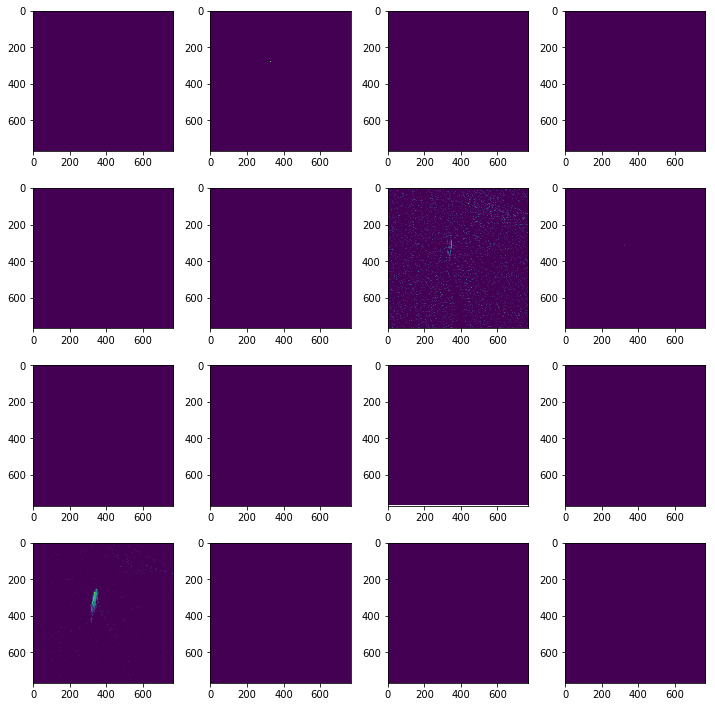

In [74]:
fig, axes = plt.subplots(4, 4, figsize=(10,10))

counter = 0
for idx, axe in enumerate(axes.flat):
    axe.imshow(outputs[counter])
    counter += 1
plt.tight_layout()
plt.show()


# Predict test images

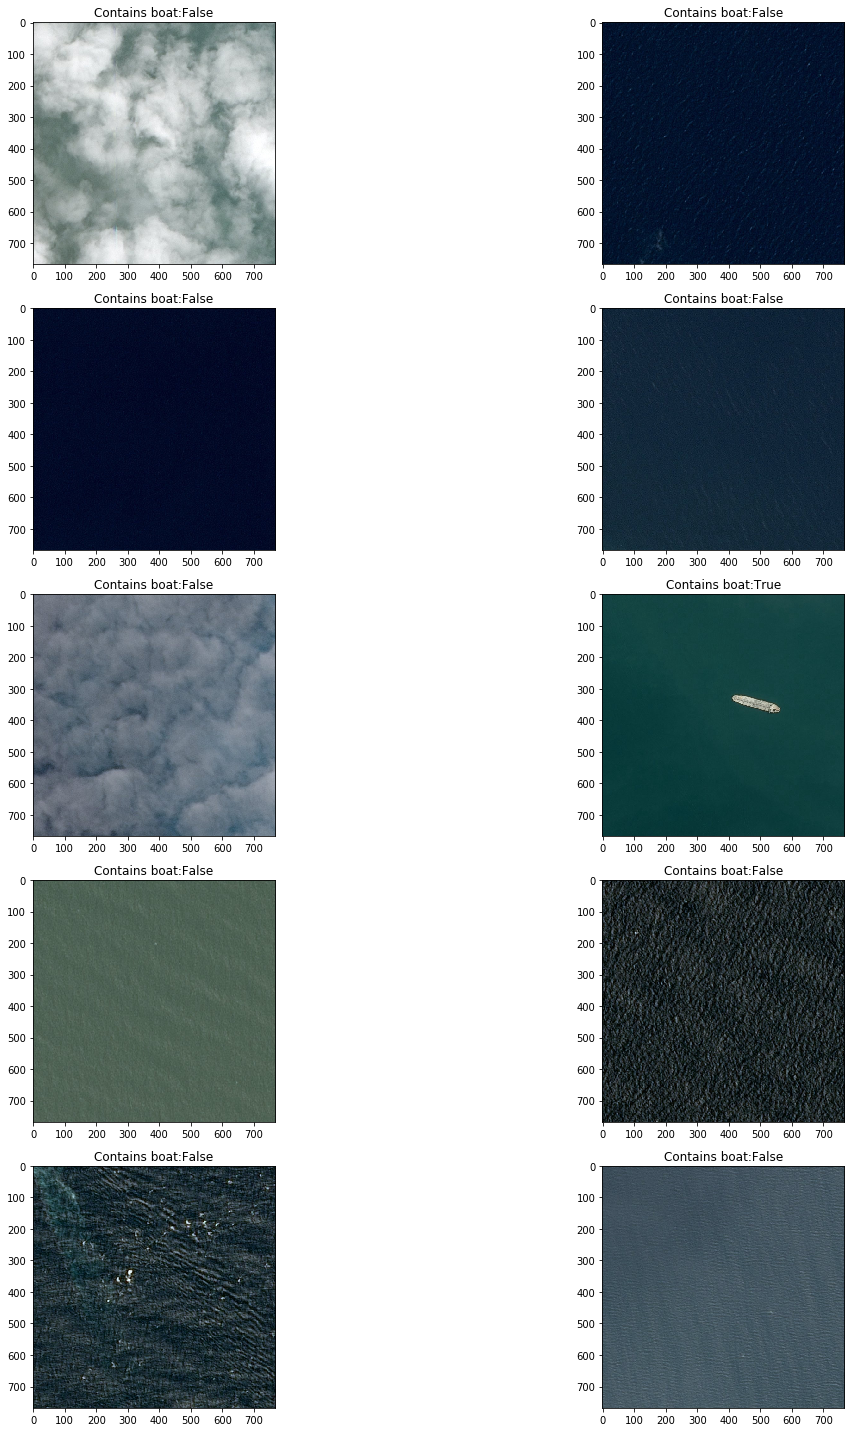

In [71]:
import os
from skimage.transform import resize
import numpy as np
import random as rn

NR_PICTURES = 10

image_list = os.listdir("input/test")
# randomly sample some images from test directory
image_paths = rn.sample(image_list, NR_PICTURES)
images = np.zeros((NR_PICTURES, 1, 768, 768, 3))
for idx, path in enumerate(image_paths):
    img_path = os.path.join("input/test", path)
    images[idx][0] = mpimg.imread(img_path)

fig, axes = plt.subplots(NR_PICTURES//2, 2, figsize=(20, 20))

for idx, ax in enumerate(axes.flat):
    prediction = model.predict(images[idx])[0]
    counter += 1
    contains_boat = prediction[0] > 0.5
    title = 'Contains boat:' + str(contains_boat)
    ax.set_title(title)
    ax.imshow(np.squeeze(images[idx]).astype(np.uint8))
plt.tight_layout()
plt.show()
